# This Notebook was generated by Gemini but has been modified to read the data from a public repo.

Also, any cells appearing below the Summary are additional to those created by Gemini

# Task
Analyse this data

Here is all the data you need:
"Popularity of Programming Languages from 2004 to 2024.csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame.



In [17]:
import pandas as pd

file_name = 'https://raw.githubusercontent.com/alanjones2/dataviz/refs/heads/master/programminglanguagesdata/Popularity%20of%20Programming%20Languages%20from%202004%20to%202024.csv'

df = pd.read_csv(file_name)
display(df.head())

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.0,0.0,1.43,8.50
1,August 2004,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.0,0.0,1.45,8.51
2,September 2004,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.0,0.0,1.54,8.38
3,October 2004,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.0,0.0,1.61,8.46
4,November 2004,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.0,0.0,1.50,8.21


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset's characteristics, including shape, data types, missing values, and the range/distribution of popularity scores for each language.



In [11]:
# Examine the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Check data types.
print("\nData Types:\n", df.dtypes)

# Identify missing values.
print("\nMissing Values per column:\n", df.isnull().sum())

# Analyze the range and distribution of popularity scores for each language.
print("\nSummary Statistics for Programming Languages:")
for col in df.columns:
  if col != 'Date':
    print(f"\nStatistics for {col}:")
    print(df[col].describe())
    print(f"Range: ({df[col].min()}, {df[col].max()})")

Shape of the DataFrame: (246, 30)

Data Types:
 Date              object
Abap             float64
Ada              float64
C/C++            float64
C#               float64
Cobol            float64
Dart             float64
Delphi/Pascal    float64
Go               float64
Groovy           float64
Haskell          float64
Java             float64
JavaScript       float64
Julia            float64
Kotlin           float64
Lua              float64
Matlab           float64
Objective-C      float64
Perl             float64
PHP              float64
Powershell       float64
Python           float64
R                float64
Ruby             float64
Rust             float64
Scala            float64
Swift            float64
TypeScript       float64
VBA              float64
Visual Basic     float64
dtype: object

Missing Values per column:
 Date             0
Abap             0
Ada              0
C/C++            0
C#               0
Cobol            0
Dart             0
Delphi/Pascal    0
Go     

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and ensuring appropriate data types.


**Reasoning**:
Convert the 'Date' column to datetime format and handle any inconsistencies in the date format.



In [12]:
# Convert 'Date' column to datetime format.
df['Date'] = pd.to_datetime(df['Date'], format='%B %Y', errors='coerce')

# Check for any remaining invalid dates.
invalid_dates = df[df['Date'].isnull()]
if not invalid_dates.empty:
    print("Warning: Invalid dates found:")
    print(invalid_dates)

display(df.head())

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,2004-07-01,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.0,0.0,1.43,8.50
1,2004-08-01,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.0,0.0,1.45,8.51
2,2004-09-01,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.0,0.0,1.54,8.38
3,2004-10-01,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.0,0.0,1.61,8.46
4,2004-11-01,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.0,0.0,1.50,8.21


## Data analysis

### Subtask:
Analyze the trends in programming language popularity over time.


**Reasoning**:
Calculate the average popularity for each programming language, determine the peak popularity and corresponding date, identify significant changes in popularity, and calculate the average popularity per year for each language.



In [13]:
# Calculate the average popularity for each programming language.
average_popularity = df.drop('Date', axis=1).mean()

# Determine the peak popularity and corresponding date for each language.
peak_popularity = {}
peak_dates = {}
for col in df.columns:
    if col != 'Date':
        peak_popularity[col] = df[col].max()
        peak_dates[col] = df.loc[df[col].idxmax(), 'Date']

# Identify significant increases or decreases in popularity.
# Calculate year-over-year percentage change.
df['Year'] = df['Date'].dt.year
yearly_popularity = df.groupby('Year').mean()
year_over_year_change = yearly_popularity.pct_change() * 100

# Calculate the average popularity per year for each language.
average_popularity_per_year = df.groupby('Year').mean()

# Display results
print("Average popularity for each language:")
display(average_popularity)

print("\nPeak popularity and corresponding date for each language:")
for language, popularity in peak_popularity.items():
    print(f"{language}: {popularity} ({peak_dates[language]})")

print("\nYear-over-year percentage change in popularity:")
display(year_over_year_change)

print("\nAverage popularity per year for each language:")
display(average_popularity_per_year)

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

**Reasoning**:
The previous code failed due to a `TypeError` when calculating the percentage change.  The error suggests that the division operation is not supported for the `DatetimeArray` index.  To fix this, we need to perform the percentage change calculation on the numeric columns only, excluding the 'Date' and 'Year' columns. We also need to handle the potential `TypeError` by ensuring the data type is numeric before performing the calculation.



In [14]:
# Calculate the average popularity for each programming language.
average_popularity = df.drop('Date', axis=1).mean()

# Determine the peak popularity and corresponding date for each language.
peak_popularity = {}
peak_dates = {}
for col in df.columns:
    if col != 'Date':
        peak_popularity[col] = df[col].max()
        peak_dates[col] = df.loc[df[col].idxmax(), 'Date']

# Identify significant increases or decreases in popularity.
# Calculate year-over-year percentage change, handling potential errors.
df['Year'] = df['Date'].dt.year
yearly_popularity = df.groupby('Year').mean()
numeric_cols = yearly_popularity.select_dtypes(include=['number']).columns
year_over_year_change = yearly_popularity[numeric_cols].pct_change() * 100

# Calculate the average popularity per year for each language.
average_popularity_per_year = df.groupby('Year').mean()

# Display results
print("Average popularity for each language:")
display(average_popularity)

print("\nPeak popularity and corresponding date for each language:")
for language, popularity in peak_popularity.items():
    print(f"{language}: {popularity} ({peak_dates[language]})")

print("\nYear-over-year percentage change in popularity:")
display(year_over_year_change)

print("\nAverage popularity per year for each language:")
display(average_popularity_per_year)

Average popularity for each language:


,0
Abap,0.497073
Ada,0.413699
C/C++,7.998211
C#,7.432764
Cobol,0.356585
Dart,0.237764
Delphi/Pascal,0.895122
Go,0.599634
Groovy,0.339919
Haskell,0.283171



Peak popularity and corresponding date for each language:
Abap: 0.76 (2012-08-01 00:00:00)
Ada: 1.14 (2023-07-01 00:00:00)
C/C++: 12.89 (2011-10-01 00:00:00)
C#: 9.94 (2013-07-01 00:00:00)
Cobol: 0.56 (2005-01-01 00:00:00)
Dart: 1.05 (2024-01-01 00:00:00)
Delphi/Pascal: 2.8 (2004-07-01 00:00:00)
Go: 2.2 (2024-11-01 00:00:00)
Groovy: 0.57 (2018-08-01 00:00:00)
Haskell: 0.39 (2014-05-01 00:00:00)
Java: 30.7 (2007-10-01 00:00:00)
JavaScript: 9.66 (2022-06-01 00:00:00)
Julia: 0.53 (2021-01-01 00:00:00)
Kotlin: 2.0 (2024-11-01 00:00:00)
Lua: 0.76 (2024-11-01 00:00:00)
Matlab: 3.45 (2010-07-01 00:00:00)
Objective-C: 6.88 (2014-03-01 00:00:00)
Perl: 7.33 (2004-07-01 00:00:00)
PHP: 20.74 (2007-08-01 00:00:00)
Powershell: 1.26 (2020-04-01 00:00:00)
Python: 31.41 (2020-07-01 00:00:00)
R: 4.72 (2024-09-01 00:00:00)
Ruby: 2.94 (2008-06-01 00:00:00)
Rust: 2.66 (2024-09-01 00:00:00)
Scala: 1.35 (2017-10-01 00:00:00)
Swift: 3.53 (2016-09-01 00:00:00)
TypeScript: 3.08 (2023-08-01 00:00:00)
VBA: 2.62 

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,Haskell,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Year,,,,,,,,,,,,,,,,,,,,,
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,-4.017857,-10.840708,-3.675199,15.208813,-12.000000,NaN,-8.526895,NaN,15.116279,8.139535,...,-46.268657,15.141278,9.336100,66.056911,-22.685185,-46.590909,NaN,inf,3.173719,-11.193136
2006,1.162791,-25.062035,-9.713619,14.399886,-0.757576,NaN,-16.137655,NaN,14.141414,25.448029,...,55.555556,22.219258,21.442125,185.556916,-32.335329,76.595745,NaN,-36.363636,3.237992,-14.951696
2007,2.298851,-10.264901,-3.877896,2.969062,-17.557252,NaN,-15.059761,inf,-2.654867,9.714286,...,33.035714,13.705805,19.375000,38.319760,-22.123894,-11.445783,NaN,85.714286,3.136435,-13.644169
2008,0.674157,-8.487085,-0.362056,10.067846,13.425926,NaN,-1.876173,-1.351351,161.818182,3.125000,...,107.382550,20.153551,29.842932,6.011776,-23.863636,57.142857,NaN,76.923077,4.206792,-4.206179
2009,6.696429,-8.870968,13.683555,-4.292790,1.224490,NaN,-11.089866,-9.589041,36.458333,-7.828283,...,47.249191,24.904153,23.991935,-7.570886,-7.462687,-27.705628,NaN,-73.188406,17.996109,3.544627
2010,45.188285,-18.584071,24.794521,-12.420932,26.209677,NaN,-18.172043,-48.484848,13.994911,-13.150685,...,68.791209,-2.724134,16.260163,-11.132195,33.870968,63.473054,NaN,-100.000000,19.167354,-2.328450
2011,13.256484,38.043478,9.871936,-1.575837,-22.204473,inf,-11.760841,-8.823529,-8.482143,15.457413,...,-3.385417,10.557455,12.307692,9.145907,-21.686747,32.234432,NaN,inf,-14.977516,-10.025260
2012,10.432570,11.023622,-24.170774,32.541694,-11.704312,183.018868,-15.040953,41.935484,6.097561,-1.639344,...,42.452830,14.995838,22.851806,2.967069,16.923077,30.470914,NaN,-50.000000,8.340114,-18.634848



Average popularity per year for each language:


,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Year,,,,,,,,,,,,,,,,,,,,,
2004,2004-09-15 20:00:00,0.373333,0.376667,9.636667,5.068333,0.500000,0.000000,2.726667,0.000000,0.071667,...,0.111667,2.713333,0.401667,0.410000,0.180000,0.146667,0.000000,0.000000,1.496667,8.353333
2005,2005-06-16 12:00:00,0.358333,0.335833,9.282500,5.839167,0.440000,0.000000,2.494167,0.000000,0.082500,...,0.060000,3.124167,0.439167,0.680833,0.139167,0.078333,0.000000,0.055000,1.544167,7.418333
2006,2006-06-16 12:00:00,0.362500,0.251667,8.380833,6.680000,0.436667,0.000000,2.091667,0.000000,0.094167,...,0.093333,3.818333,0.533333,1.944167,0.094167,0.138333,0.000000,0.035000,1.594167,6.309167
2007,2007-06-16 12:00:00,0.370833,0.225833,8.055833,6.878333,0.360000,0.000000,1.776667,0.061667,0.091667,...,0.124167,4.341667,0.636667,2.689167,0.073333,0.122500,0.000000,0.065000,1.644167,5.448333
2008,2008-06-16 08:00:00,0.373333,0.206667,8.026667,7.570833,0.408333,0.000000,1.743333,0.060833,0.240000,...,0.257500,5.216667,0.826667,2.850833,0.055833,0.192500,0.000000,0.115000,1.713333,5.219167
2009,2009-06-16 12:00:00,0.398333,0.188333,9.125000,7.245833,0.413333,0.000000,1.550000,0.055000,0.327500,...,0.379167,6.515833,1.025000,2.635000,0.051667,0.139167,0.000000,0.030833,2.021667,5.404167
2010,2010-06-16 12:00:00,0.578333,0.153333,11.387500,6.345833,0.521667,0.000000,1.268333,0.028333,0.373333,...,0.640000,6.338333,1.191667,2.341667,0.069167,0.227500,0.000000,0.000000,2.409167,5.278333
2011,2011-06-16 12:00:00,0.655000,0.211667,12.511667,6.245833,0.405833,0.044167,1.119167,0.025833,0.341667,...,0.618333,7.007500,1.338333,2.555833,0.054167,0.300833,0.000000,0.020000,2.048333,4.749167
2012,2012-06-16 08:00:00,0.723333,0.235000,9.487500,8.278333,0.358333,0.125000,0.950833,0.036667,0.362500,...,0.880833,8.058333,1.644167,2.631667,0.063333,0.392500,0.000000,0.010000,2.219167,3.864167


## Data visualization

### Subtask:
Visualize the trends in programming language popularity over time using line charts, bar charts, and other relevant visualizations.


**Reasoning**:
Create line charts, bar charts, and other visualizations to show trends in programming language popularity over time.  This will involve plotting the popularity of each language over time, comparing average popularity across languages, and visualizing year-over-year changes, peak popularity, and average yearly popularity.



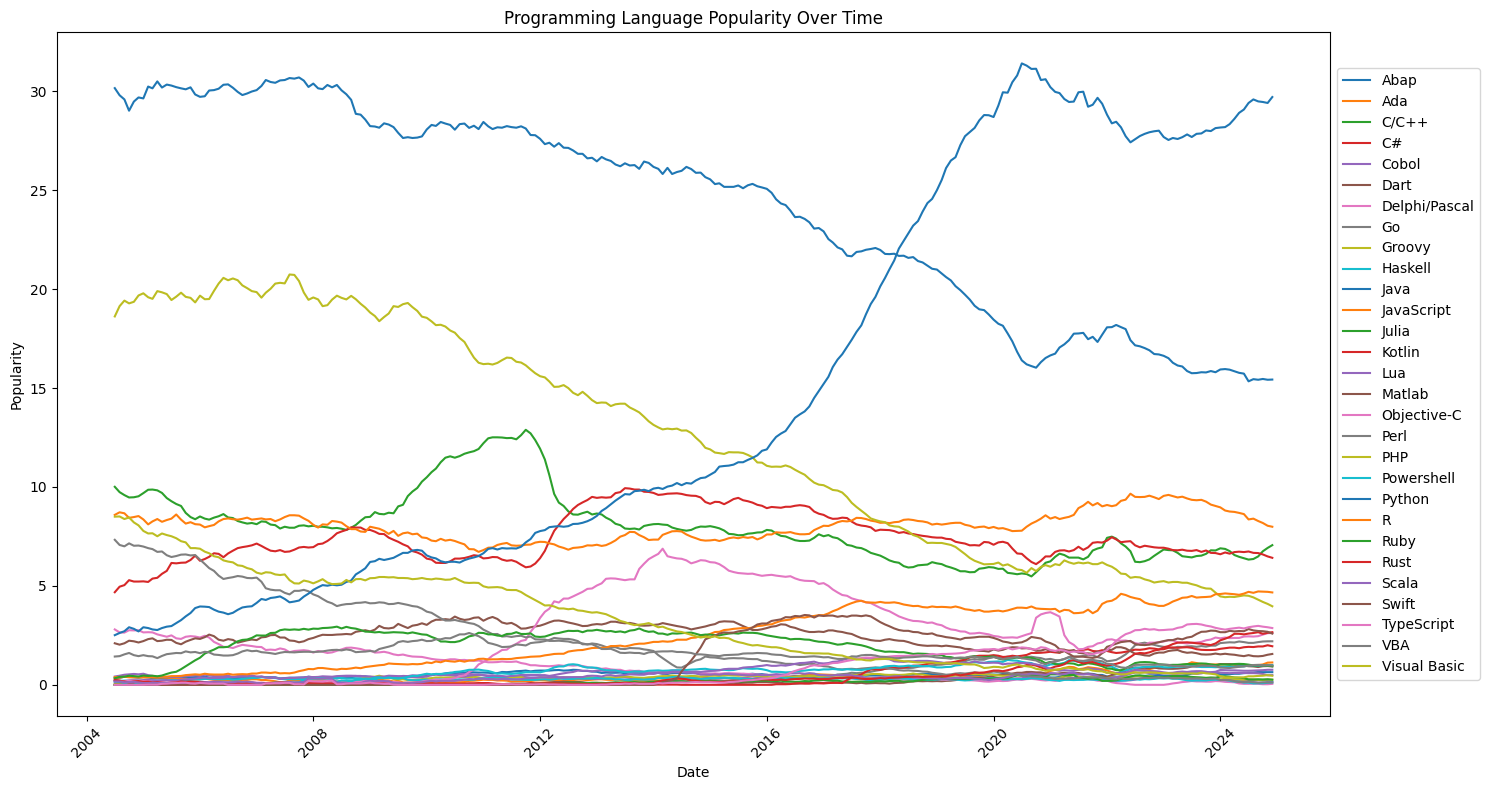

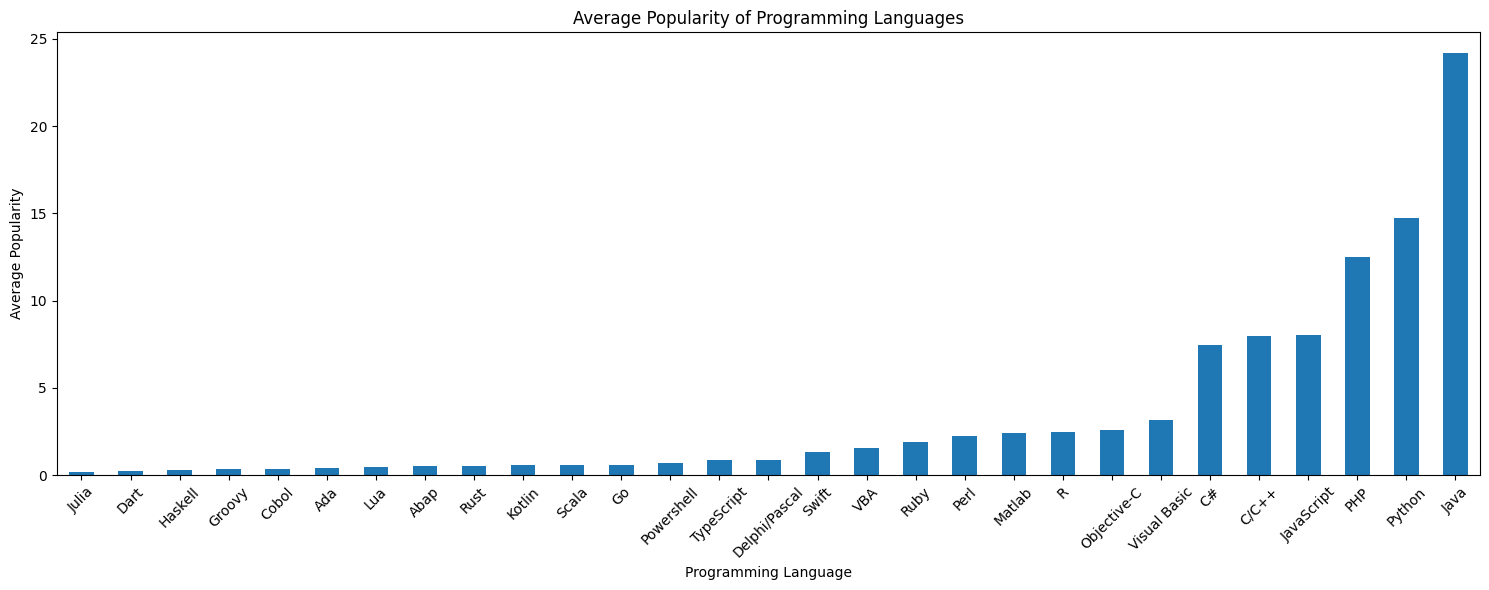

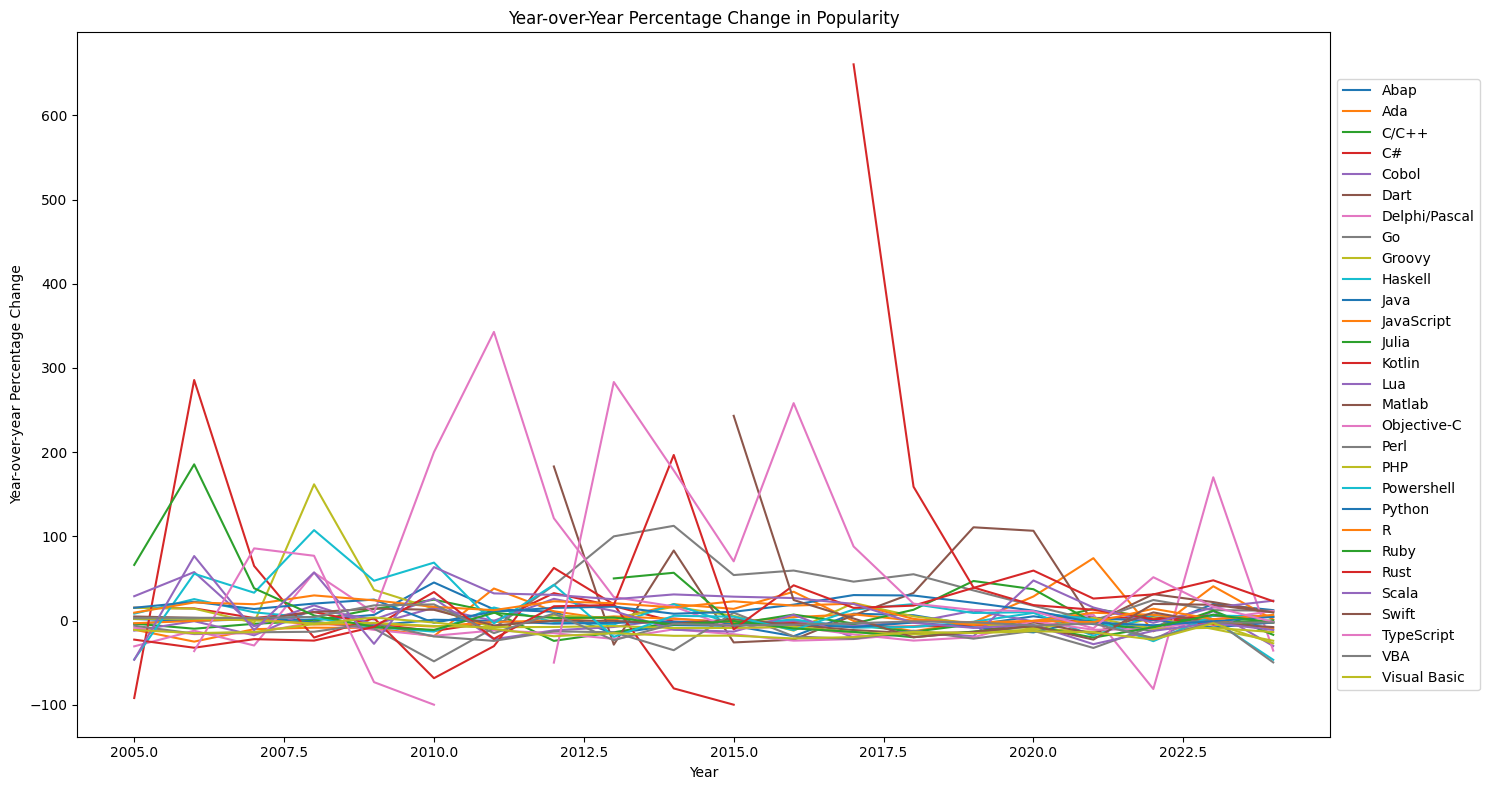

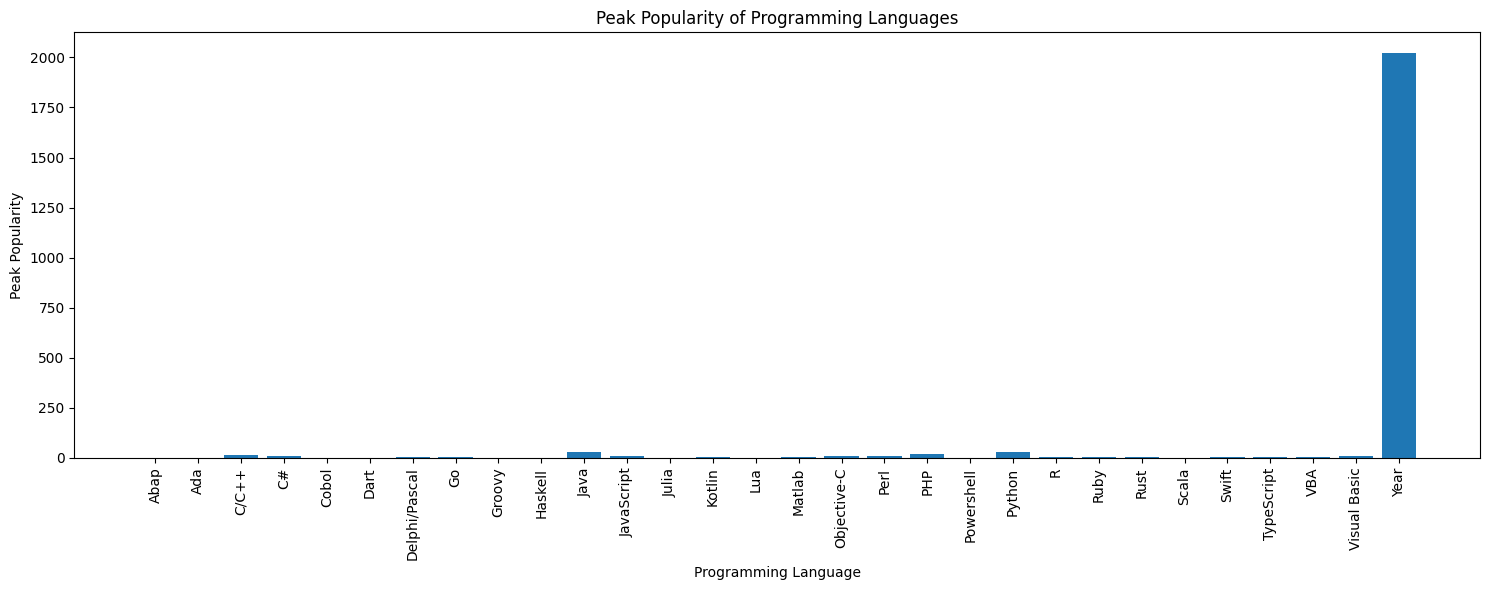

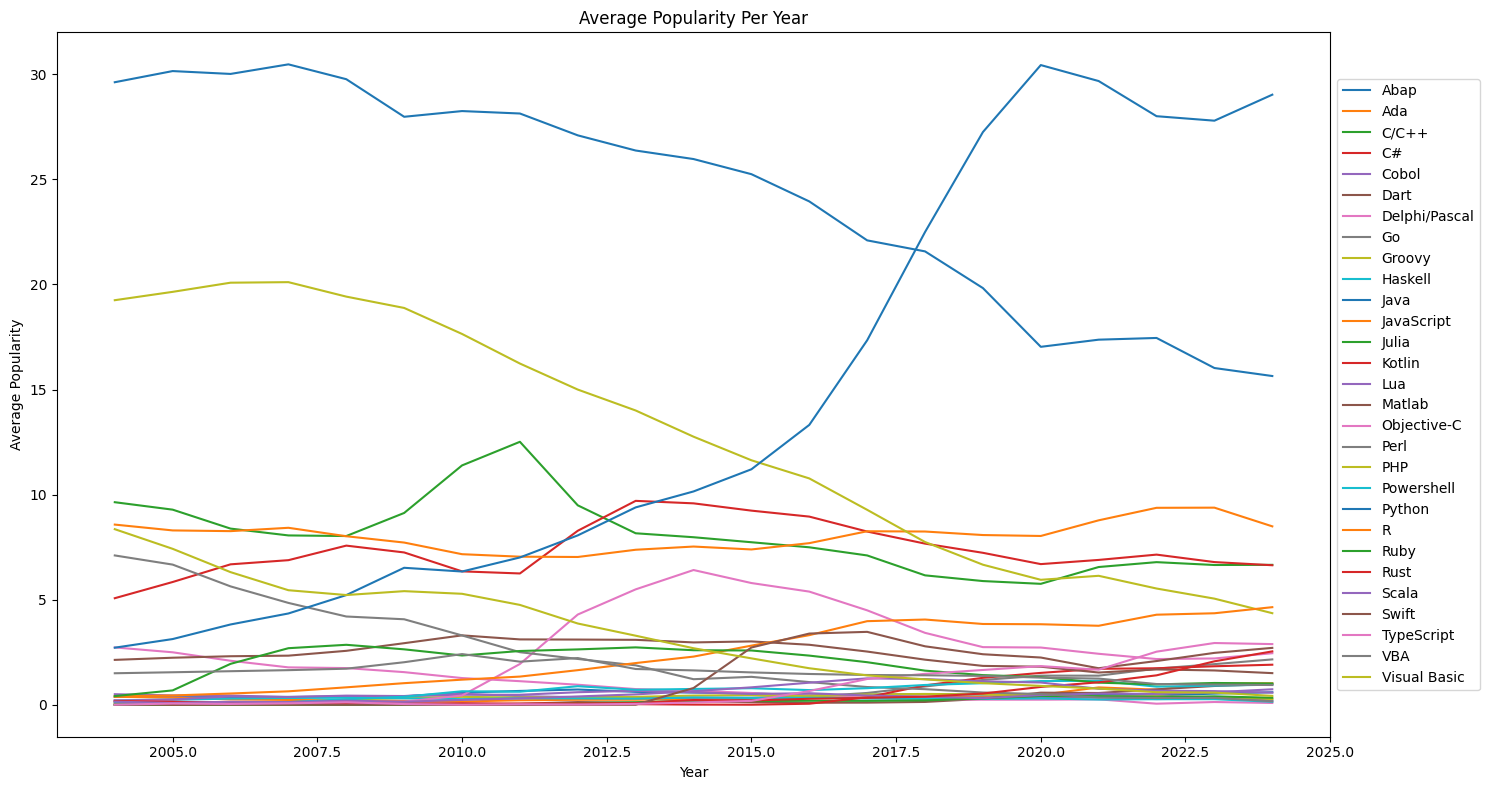

In [15]:
import matplotlib.pyplot as plt

# Line charts for each language's popularity over time
plt.figure(figsize=(15, 8))
for col in df.columns:
    if col not in ['Date', 'Year']:
        plt.plot(df['Date'], df[col], label=col)
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Programming Language Popularity Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart of average popularity
average_popularity = df.drop(['Date', 'Year'], axis=1).mean()
plt.figure(figsize=(15, 6))
average_popularity.sort_values().plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Programming Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Year-over-year percentage change
plt.figure(figsize=(15, 8))
for col in year_over_year_change.columns:
    plt.plot(year_over_year_change.index, year_over_year_change[col], label=col)
plt.xlabel('Year')
plt.ylabel('Year-over-year Percentage Change')
plt.title('Year-over-Year Percentage Change in Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Peak popularity and date
peak_languages = list(peak_popularity.keys())
peak_values = list(peak_popularity.values())
plt.figure(figsize=(15, 6))
plt.bar(peak_languages, peak_values)
plt.xticks(rotation=90)
plt.xlabel("Programming Language")
plt.ylabel("Peak Popularity")
plt.title("Peak Popularity of Programming Languages")
plt.tight_layout()
plt.show()

# Average popularity per year
plt.figure(figsize=(15, 8))
for col in average_popularity_per_year.columns:
    if col not in ['Date','Year']:
        plt.plot(average_popularity_per_year.index, average_popularity_per_year[col], label=col)
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity Per Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No explicit questions were posed in the data analysis task.  However, the task implicitly asks for an understanding of programming language popularity trends over time.  The analysis reveals the average popularity, peak popularity with corresponding dates, year-over-year changes, and average yearly popularity for each language.

### 2. Data Analysis Key Findings

* **Average Popularity:**  The analysis calculated the average popularity for each programming language over the entire period (2004-2024).  Languages like Java exhibit higher average popularity compared to languages like Haskell and Cobol.
* **Peak Popularity and Timing:** The peak popularity score and the corresponding date were identified for each programming language.  This allows for the identification of periods of maximum popularity for each language.
* **Year-over-Year Change:**  The year-over-year percentage change in popularity reveals periods of significant growth or decline for each programming language.  This analysis helps identify consistently growing or declining languages.
* **Average Yearly Popularity:** The average popularity per year for each language provides a detailed view of how popularity evolved annually. This granular view complements the overall trend analysis.


### 3. Insights or Next Steps

* **Identify Key Drivers of Popularity Fluctuations:** Investigate external factors (e.g., technological advancements, market trends, new frameworks) that may have influenced the popularity shifts observed in the data.
* **Predictive Modeling:** Explore the use of time series forecasting models to predict future popularity trends for different programming languages based on historical data and external factors.


#### End of plan execution
---

#### Extra cells

### Create a plot from the original data that plots the top 10 most popular languages over time

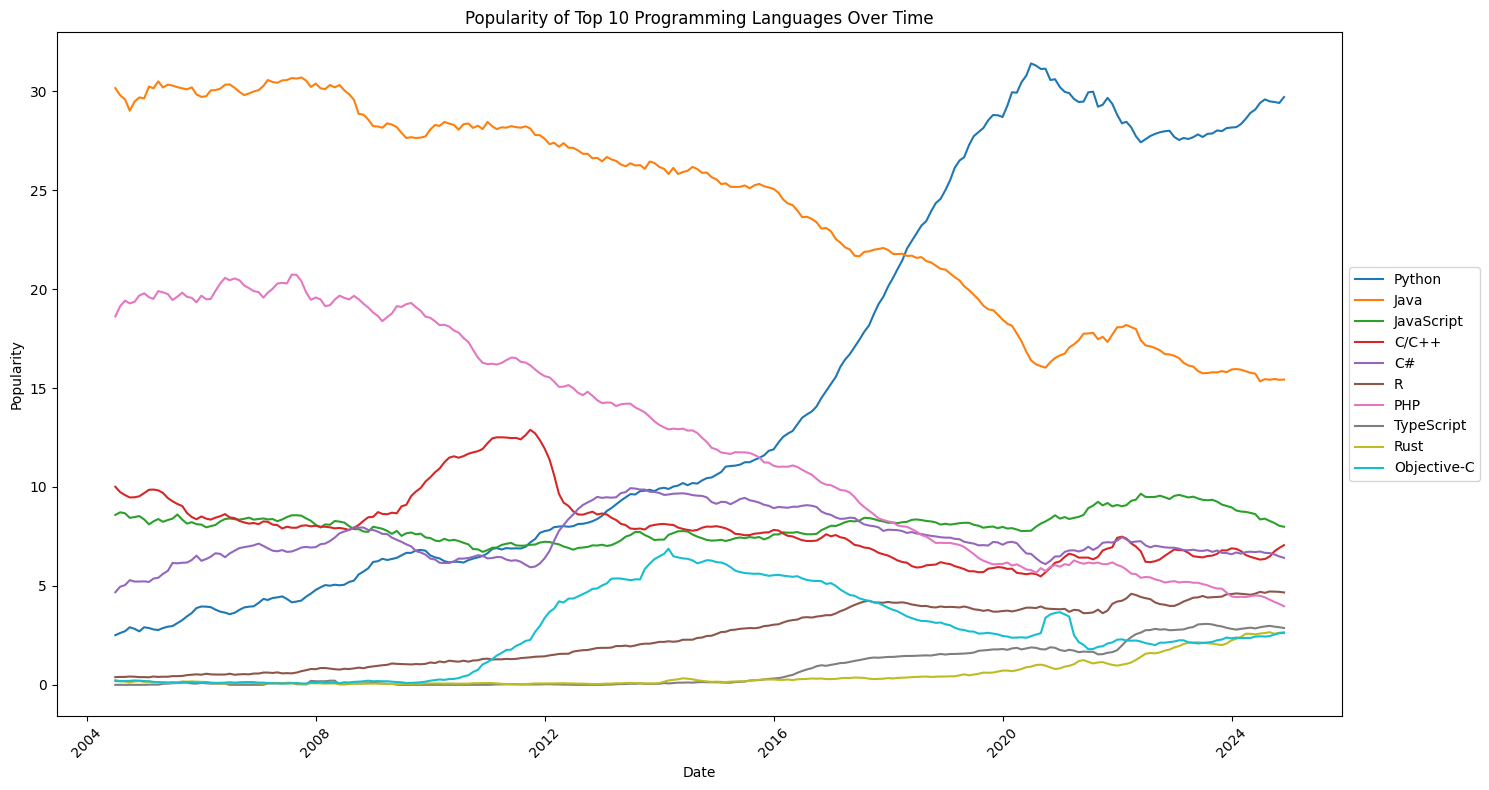

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data (assuming it's in a CSV file named 'Popularity of Programming Languages from 2004 to 2024.csv')
df = pd.read_csv(file_name)
df['Date'] = pd.to_datetime(df['Date'], format='%B %Y', errors='coerce')

# Get the latest popularity figures (last row of the DataFrame)
latest_popularity = df.iloc[-1].drop('Date')

# Sort languages by popularity and select the top 10
top_10_languages = latest_popularity.sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 languages and relevant columns
filtered_df = df[['Date'] + list(top_10_languages)]

# Create the plot
plt.figure(figsize=(15, 8))
for language in top_10_languages:
    plt.plot(filtered_df['Date'], filtered_df[language], label=language)

plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of Top 10 Programming Languages Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Repeat the plot above highlighting the top three languages with the others plotted in grey

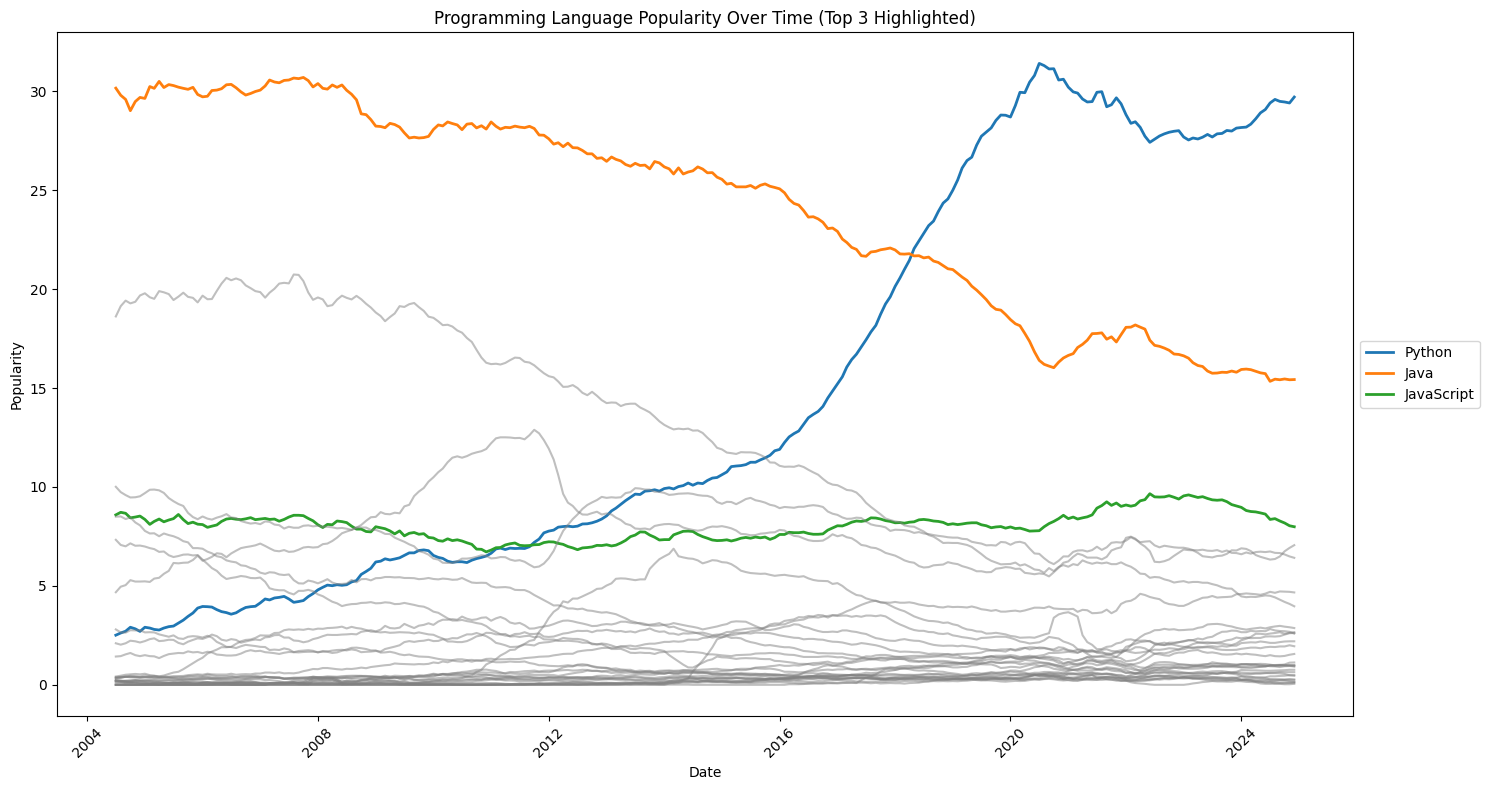

In [19]:
# prompt: repeat the last plot with the top three languages in  highlighted and the others plotted in grey

import matplotlib.pyplot as plt
# Identify the top three languages based on latest popularity
latest_popularity = df.iloc[-1].drop('Date')
top_three = latest_popularity.sort_values(ascending=False).head(3).index

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the top three languages with distinct colors
for language in top_three:
    plt.plot(df['Date'], df[language], label=language, linewidth=2)

# Plot the remaining languages in grey
other_languages = [col for col in df.columns if col not in ['Date', 'Year'] and col not in top_three]
for language in other_languages:
    plt.plot(df['Date'], df[language], color='grey', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Programming Language Popularity Over Time (Top 3 Highlighted)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
